<a href="https://colab.research.google.com/github/kosijnova/Linear-Regression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data to analyis: 
           y     x1       x2     x3      x4    x5
0  13384229  632.3  2636.81  46876   816.8  14.8
1  14588739  695.0  2866.04  49536   962.8  11.2
2  16079533  841.1  3158.48  49054  1052.1   9.5
3  16494650  818.8  3315.38  44196   710.1  12.1
4  17239800  784.8  3435.00  38832   722.2  12.4
5  18125490  740.2  3625.21  40065   654.4  12.5
6  18744412  540.0  3744.38  37046   705.5  13.4
7  19389446  475.1  3877.43  35847   711.9  13.4
8  20003863  472.6  4003.99  34970   748.9  11.4
9  20723423  534.7  4150.88  33070   799.5   9.7 

Best combination of variables: 
{'H': Combinations        [x2]
H               0.998678
Name: 1, dtype: object, 'Data': {'Combinations': [['x1'], ['x2'], ['x3'], ['x4'], ['x5'], ['x1', 'x2'], ['x1', 'x3'], ['x1', 'x4'], ['x1', 'x5'], ['x2', 'x3'], ['x2', 'x4'], ['x2', 'x5'], ['x3', 'x4'], ['x3', 'x5'], ['x4', 'x5'], ['x1', 'x2', 'x3'], ['x1', 'x2', 'x4'], ['x1', 'x2', 'x5'], ['x1', 'x3', 'x4'], ['x1', 'x3', 'x5'], ['x1', 'x4', 'x5'], ['

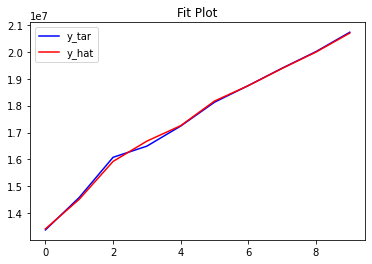

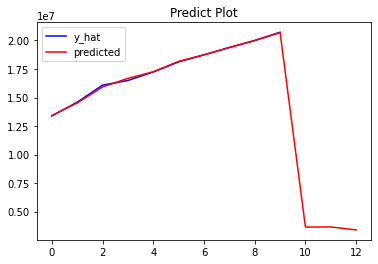

In [462]:
from IPython.lib.display import ScribdDocument
class WrongColumnsNames(Exception):
    pass

class WrongLengthError(Exception):
    pass

class LinearRegression(object):
  def __init__(self, df, y_names, x_names):
    self.df = df
    self.y_names = y_names
    self.x_names = x_names
    
  #Prepare data to LSM
  @staticmethod
  def data_prep(df, x_names, y_names):
    try:
        colnames = y_names + x_names
        if all(x in df.columns.values.tolist() for x in colnames) == False:
            raise WrongColumnsNames
    except WrongColumnsNames:
        print("Check columns names!")
        sys.exit() 
    else:
        df = df[colnames]
        alpha = pd.DataFrame(np.ones(len(df)), columns = ['alpha'])
        df = pd.concat([alpha, df], axis = 1)
    return df
    
  @staticmethod
  def lsm(df, x_names, y_names):
    y = df[y_names].to_numpy()
    x = df[['alpha'] + x_names].to_numpy()
    x_t = np.transpose(x)
    #first part of formula
    f_part = np.matmul(x_t, x)
    f_part = np.linalg.inv(f_part)
    
    #second part of formula
    s_part = np.matmul(x_t, y)
    
    #out
    out = np.transpose(np.matmul(f_part, s_part))
    
    return out

  @staticmethod
  def y_hat(x, out):
    y_hat = np.sum(np.multiply(x, out), axis = 1)
    y_hat = np.array([y_hat]).T
    return y_hat

  @staticmethod
  def remainder(y_tar, y_hat):
    remainder = y_tar - y_hat
    return remainder.to_numpy()

  @staticmethod
  def table(y_tar, y_hat, remainder):
    y_tar = pd.DataFrame(y_tar, columns = ['y_tar'])
    y_hat = pd.DataFrame(y_hat, columns = ['y_hat'])
    remainder = pd.DataFrame(remainder, columns = ['remainder'])
    table = pd.concat([y_tar, y_hat, remainder], axis = 1)
    
    return table
    
  #measure of model fit, which part explains the model
  @staticmethod
  def r2(y_tar, y_hat):
    y_tar = y_tar.to_numpy()
    avg = np.mean(y_tar)
    down = np.sum(np.power(np.subtract(y_tar, avg), 2))
    up = np.sum(np.power(np.subtract(y_hat, avg), 2))
    r2 = up/down
    
    return r2
      
  #measure of model fit, which part do not explains the model
  @staticmethod
  def phi2(remainder, y_tar):
    avg = np.mean(y_tar)
    down = np.sum(np.power(np.subtract(y_tar, avg), 2))
    up = np.sum(np.power(remainder, 2))
    phi2 = up/down

    return phi2
    
  #residual standard deviation
  #tells us, how much our theoretical values are different from empirical
  @staticmethod
  def rss(remainder, lsm):
    n = len(remainder)
    k = len(lsm[0])-1
    rss = np.sqrt((1/(n - k - 1)) * np.sum(np.power(remainder, 2)))
    
    return rss

  #coefficent of variation
  #the smaller it is, the better the model
  @staticmethod
  def cv(rss, y_tar_avg):
    cv = (rss/y_tar_avg) * 100

    return cv

  #correlation
  def corr(x_array, y_array):
    x_sub = np.subtract(x_array, np.mean(x_array))
    y_sub = np.subtract(y_array, np.mean(y_array))
    xy_sub_mul_sum = np.sum(np.multiply(x_sub, y_sub))

    x_sub_pow = np.power(np.subtract(x_array, np.mean(x_array)), 2)
    y_sub_pow = np.power(np.subtract(y_array, np.mean(y_array)), 2)
    x_sub_pow_sum = np.sum(x_sub_pow)
    y_sub_pow_sum = np.sum(y_sub_pow)

    corr = (xy_sub_mul_sum)/np.sqrt(x_sub_pow_sum * y_sub_pow_sum)

    return corr
  #the white test for Homoscedasticity 
  #def homoscedasticity()

  def fit(self):
    data = self.data_prep(self.df, self.x_names, self.y_names)
    
    self.lsm = self.lsm(data, self.x_names, self.y_names)
    
    y_tar = data[self.y_names].to_numpy()
    
    x = data[['alpha'] + self.x_names].to_numpy()
    y_hat = self.y_hat(x, self.lsm)
    
    remainder = self.remainder(data[self.y_names], y_hat)
    
    rss = self.rss(remainder, self.lsm)

    cv = self.cv(rss, np.mean(y_tar))

    phi2 = self.phi2(remainder, y_tar)

    coef = self.r2(data[self.y_names], y_hat)
    
    FIT = namedtuple("FIT", "COEF y_tar y_hat remainder RSS PHI2 CV R2")
    fit = FIT(self.lsm, y_tar, y_hat, remainder, rss, phi2, cv, coef)
    
    return fit
    
  def predict(self, x):
    try:
        if len(self.lsm[0])-1 != x.shape[1]:
            raise WrongLengthError
    except WrongLengthError:
        print("Wrong Vector Length!")
        sys.exit()
    else:
        ones = np.ones(len(x))
        x = np.insert(x, 0, np.ones(len(x)).tolist(), axis = 1)
        y_hat = np.sum(np.multiply(x, self.lsm), axis = 1)
        y_hat = np.array([y_hat]).T
    
    return y_hat

class HellwigMethod(LinearRegression):
  def hellwig(self):
    self.df_analysis = LinearRegression.data_prep(self.df, self.x_names, self.y_names)
    del self.df_analysis['alpha']

    S = 2 ** len(self.x_names) - 1

    df_numpy = (self.df.to_numpy())
    x = self.x_names
    y = self.y_names

    corrcoef = np.corrcoef(df_numpy, rowvar = False)
    absolute_corrcoef = np.absolute(corrcoef)

    abs_corrcoefT = absolute_corrcoef.T
    x_abs_corrcoefT = np.delete(abs_corrcoefT, 0, 1)
    x_abs_corrcoefT = np.delete(x_abs_corrcoefT, 0, 0)

    onehot_matrix = np.zeros((2 ** len(x) - 1, len(x)))
    onehot_matrix = pd.DataFrame(onehot_matrix, columns = x)
    var_comb = []

    index = 0
    abs_corrcoefT_2 = np.delete(abs_corrcoefT, 0, 1)
    H_list = []

    for i in range(1, len(x)+1):
      comb = list(combinations(x,i))
      r = np.power(abs_corrcoefT_2[[0]], 2)

      for j in comb:
        temp = list(j)
        var_comb.append(temp)
        onehot_matrix.loc[[index],temp] = 1
        row = onehot_matrix.loc[[index]].to_numpy()

        down_list = []
        for k in range(len(x)):
          corr = x_abs_corrcoefT[:,[k]]
          down = np.matmul(row, corr)
          down_list.append(down)

        h = r / np.array(down_list).T * row
        h = h[:,~(h==0).all(0)]
        H_values = sum(h[0])

        H_list.append(H_values)
        index += 1

    data_out = {'Combinations': var_comb,
                'H': H_list}
    hellwig_out_df = pd.DataFrame(data_out)
    idx = hellwig_out_df['H'].idxmax()
    out = hellwig_out_df.loc[idx]

    return {'H': out, 'Data': data_out}

if __name__ == "__main__":
    from collections import namedtuple
    from itertools import combinations
    import pandas as pd
    import numpy as np
    import sys
    from matplotlib import pyplot as plt
    
    data_1 = {'y': np.random.rand(10), 'x1': np.random.rand(10)+1, 'x2': np.random.rand(10)+2}
    df_1 = pd.DataFrame(data)

    data_2 = {'Y': [150,250,300,350,400,380,450,400], 
              'X1': [200,300,400,400,500,500,600,700],
              'X2': np.random.rand(8)}
    df_2 = pd.DataFrame(data_2)

    data_3 = {'y': [13384229,14588739,16079533,16494650,17239800,18125490,18744412,19389446,20003863,20723423],
          'x1': [632.3,695,841.1,818.8,784.8,740.2,540,475.1,472.6,534.7],
          'x2': [2636.81,2866.04,3158.48,3315.38,3435,3625.21,3744.38,3877.43,4003.99,4150.88],
          'x3': [46876,49536,49054,44196,38832,40065,37046,35847,34970,33070],
          'x4': [816.8,962.8,1052.1,710.1,722.2,654.4,705.5,711.9,748.9,799.5],
          'x5': [14.8,11.2,9.5,12.1,12.4,12.5,13.4,13.4,11.4,9.7]}

    df_3 = pd.DataFrame(data_3)

    print('Data to analyis: \n', df_3, '\n')

    #Hellwig Method
    h = HellwigMethod(df_3, ['y'], ['x1','x2','x3','x4','x5'])
    hellwig = h.hellwig()
    print(f'Best combination of variables: \n{hellwig}\n')

    #Linear Regression
    kmnk = LinearRegression(df_3, ['y'], ['x2'])
    fit = kmnk.fit()

    values_1 = np.array([[0.12,1.22],[0.34,1.34],[0.95,2.45]])
    values_2 = np.array([[700,0.12],[600,0.4],[500,0.5],[810,1.12]])
    values_3 = np.array([[600.12],[602.13],[548.12]])
    pred = (kmnk.predict(values_3))

    print(f'Coefficients: {fit.COEF}\n')
    print(f'R2: {fit.R2}\n')
    print(f'PHI2: {fit.PHI2}\n')
    print(f'R2 + PHI2: {fit.R2 + fit.PHI2}\n')
    print(f'RSS: {fit.RSS}\n')
    print(f'CV: {fit.CV}\n')
    print('\nTable with remainder: \n', kmnk.table(fit.y_tar, fit.y_hat, fit.remainder), '\n')
    print(f'Predicted values of {values_3.tolist()}:\n {pred.tolist()}\n')

    #fit plot
    plt.plot(fit.y_tar, color = 'blue', label = 'y_tar')
    plt.plot(fit.y_hat, color = 'red', label = 'y_hat')
    plt.title('Fit Plot')
    plt.legend()
    plt.show()

    #plot with fit and predicted values
    plt.plot(fit.y_tar, color = 'blue', label = 'y_hat')
    plt.plot(np.append(fit.y_hat, pred), color = 'red', label = 'predicted')
    plt.title('Predict Plot')
    plt.legend()
    plt.show()